In [11]:
pip install imbalanced-learn

     |████████████████████████████████| 167 kB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [419]:

import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_7d5d0d16a6454b0987a63e487c91c25b.csv"
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [420]:
df.shape

(768, 9)

In [421]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [422]:
df.groupby("Outcome").count().T

Outcome,0,1
Pregnancies,500,268
Glucose,500,268
BloodPressure,500,268
SkinThickness,500,268
Insulin,500,268
BMI,500,268
DiabetesPedigreeFunction,500,268
Age,500,268


In [423]:
268*0.5

134.0

In [424]:
500*0.3

150.0

In [425]:
234/768

0.3046875

In [426]:
X=df.drop(["Outcome"],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [427]:
y=df[["Outcome"]]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [428]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [429]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
1,213.161752
5,71.772072
7,46.140611
0,39.670227
6,23.871300
4,13.281108
3,4.304381
2,3.256950


In [430]:
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [431]:
BForest=BalancedRandomForestClassifier(n_estimators=300,criterion="entropy",max_depth=4,min_samples_split=4,min_samples_leaf=1,max_features="sqrt",bootstrap=False,sampling_strategy="not majority",replacement=False,n_jobs=-1,warm_start=False,class_weight="balanced_subsample",random_state=0).fit(X,y)
scores=cross_val_score(BForest,X,np.asarray(y).reshape(y.shape[0],),cv=12)
print("Accuracy: ",scores.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:  0.765625


In [432]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(BForest, X, np.asarray(y).reshape(y.shape[0],), cv=12)
AUC = roc_auc_score(y, y_pred)
print("AUC for the BalanaedRandomForest model: ",AUC)

AUC for the BalanaedRandomForest model:  0.7706567164179106


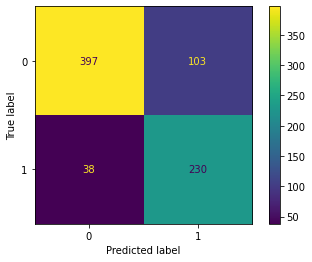

In [433]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(BForest,X,y)
plt.show()

In [434]:
print("True positive rate: ",230/(230+38))
print("True negative rate: ", 397/(397+103))

True positive rate:  0.8582089552238806
True negative rate:  0.794


In [435]:
y1_pred=BForest.predict_proba(X)
y1_pred=round(pd.DataFrame(y1_pred).rename(columns={0:"Pred_0",1:"Pred_1"}),3)
y1_pred.head()

,Pred_0,Pred_1
0,0.260,0.740
1,0.743,0.257
2,0.322,0.678
3,0.871,0.129
4,0.228,0.772


In [436]:
y_probs1=y1_pred[["Pred_1"]]

In [437]:
import numpy as np
thresholds=np.arange(0,1,0.001)

In [438]:
def to_labels(pos_probs,threshold):
    return (pos_probs >= threshold).astype('int')

In [439]:
from sklearn.metrics import f1_score
scores=[f1_score(y, to_labels(y_probs1,t)) for t in thresholds]

In [440]:
ix=np.argmax(scores)
print((thresholds[ix],scores[ix]))

(0.5630000000000001, 0.7810218978102189)


In [441]:
len(y_probs1[y_probs1["Pred_1"]>=0.563])

282

In [442]:
y1_pred["Pred_0"]=np.where((y1_pred.Pred_0 >=0.563),1,y1_pred.Pred_0)
y1_pred["Pred_0"]=np.where((y1_pred.Pred_0 < 0.563),0,y1_pred.Pred_0)
y1_pred["Pred_1"]=np.where((y1_pred.Pred_1 >=0.563),1,y1_pred.Pred_1)
y1_pred["Pred_1"]=np.where((y1_pred.Pred_1 <0.563),0,y1_pred.Pred_1)

In [447]:
y1_pred["Pred_0"]=np.where((y1_pred.Pred_0 == y1_pred.Pred_1),1,y1_pred.Pred_0)
#y1_pred["Pred_0"]=np.where((y1_pred.Pred_0 == y1_pred.Pred_1),1,y1_pred.Pred_0)

In [444]:
len11=len(y1_pred[y1_pred["Pred_1"]==1])
print("The number of predicted positive cases: ",len11)

The number of predicted positive cases:  282


In [445]:
768-282

486

In [448]:
len00=len(y1_pred[y1_pred["Pred_0"]==1])
print("The number of predicted negative cases: ",len00)

The number of predicted negative cases:  486


In [449]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
y_true=np.asarray(y).reshape(-1,1)
y_true=pd.DataFrame(enc.fit_transform(y_true).toarray())

In [450]:
y_true=enc.inverse_transform(y_true)
y1_pred=enc.inverse_transform(y1_pred)

In [451]:
print("Accuracy after adjusting the threshold: ",accuracy_score(y_true,y1_pred))

Accuracy after adjusting the threshold:  0.8411458333333334


In [452]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix after adjusting the threshold: \n",confusion_matrix(y_true,y1_pred))

Confusion matrix after adjusting the threshold: 
 [[432  68]
 [ 54 214]]


In [453]:
print("After adjusting the threshold: \n")
print("True positive rate: ",214/(214+54))
print("True negative rate: ",432/(432+68))

After adjusting the threshold: 

True positive rate:  0.7985074626865671
True negative rate:  0.864


In [454]:
print("AUC after adjusting the threshold: ",roc_auc_score(y_true,y1_pred))

AUC after adjusting the threshold:  0.8312537313432836


In [18]:
from imblearn.ensemble import EasyEnsembleClassifier
Ensemble=EasyEnsembleClassifier(n_estimators=9,warm_start=False,sampling_strategy="not majority",replacement=False,n_jobs=-1,random_state=0).fit(X,y)
scores=cross_val_score(Ensemble,X,np.asarray(y).reshape(y.shape[0],),cv=12)
print("Accuracy: ",scores.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.75390625


In [19]:
y_pred = cross_val_predict(Ensemble, X, np.asarray(y).reshape(y.shape[0],), cv=12)
AUC = roc_auc_score(y, y_pred)
print("AUC for the EasyEnsembleClassifier model: ",AUC)

AUC for the EasyEnsembleClassifier model:  0.7175074626865672


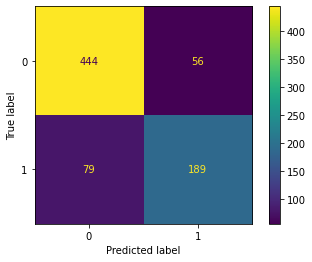

In [20]:
plot_confusion_matrix(Ensemble,X,y)
plt.show()

In [21]:
print("True positive rate: ",189/(189+79))
print("True negative rate: ",444/(444+56))

True positive rate:  0.7052238805970149
True negative rate:  0.888


In [272]:
df0=df[df["Outcome"]==0]
df0=df0.sample(frac=0.3)
df0.shape

(150, 9)

In [273]:
df1=df[df["Outcome"]==1]
df1=df1.sample(frac=0.5)
df1.shape

(134, 9)

In [274]:
train=pd.concat([df0,df1],axis=0)
X_train=train.drop(["Outcome"],axis=1)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
329,6,105,70,32,68,30.8,0.122,37
727,0,141,84,26,0,32.4,0.433,22
555,7,124,70,33,215,25.5,0.161,37
342,1,0,68,35,0,32.0,0.389,22
223,7,142,60,33,190,28.8,0.687,61


In [275]:
y_train=train[["Outcome"]]
y_train.head()

,Outcome
329,0
727,0
555,0
342,0
223,0


In [276]:
test=df.drop(train.index)
test.shape

(484, 9)

In [277]:
X_test=test.drop(["Outcome"],axis=1)
y_test=test[["Outcome"]]

In [278]:
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.538973,-0.585277,0.049494,0.723395,-0.112949,-0.176688,-1.127018,0.345327
1,-1.174477,0.509467,0.752315,0.337222,-0.725494,0.014745,-0.179750,-0.972858
2,0.824548,-0.007495,0.049494,0.787757,1.211229,-0.810811,-1.008228,0.345327
3,-0.888902,-3.778282,-0.050909,0.916482,-0.725494,-0.033113,-0.313768,-0.972858
4,0.824548,0.539877,-0.452520,0.787757,0.986029,-0.415980,0.593903,2.454424


In [279]:
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.705766,0.931071,0.149549,0.902423,-0.675238,0.234092,0.502563,1.392311
1,-0.820556,-1.086569,-0.166298,0.531438,-0.675238,-0.689519,-0.328319,-0.195645
2,-0.820556,-0.958465,-0.166298,0.160453,0.124508,-0.491602,-0.882240,-1.031412
3,0.400502,-0.093762,0.254831,-1.261655,-0.675238,-0.821463,-0.779885,-0.279222
4,1.926824,-0.125788,-3.640611,-1.261655,-0.675238,0.458398,-0.981585,-0.362799


In [280]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.0055,
              loss='exponential', max_depth=2, max_features='sqrt',
              max_leaf_nodes=None, min_impurity_decrease=0.001,
              min_impurity_split=None, min_samples_leaf=2,
              min_samples_split=2, min_weight_fraction_leaf=0.01,
              n_estimators=70, n_iter_no_change=None, presort='auto',
              random_state=0, subsample=0.7, tol=0.0001,ccp_alpha=0.015,
              validation_fraction=0.2, verbose=0, warm_start=False).fit(X_train,y_train)
gradient

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:309: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


GradientBoostingClassifier(ccp_alpha=0.015, criterion='mae',
                           learning_rate=0.0055, loss='exponential',
                           max_depth=2, max_features='sqrt',
                           min_impurity_decrease=0.001, min_samples_leaf=2,
                           min_weight_fraction_leaf=0.01, n_estimators=70,
                           presort='auto', random_state=0, subsample=0.7,
                           validation_fraction=0.2)

In [281]:
from sklearn.metrics import accuracy_score
y_pred=gradient.predict(X_test)
print("Accuracy on test data: ",accuracy_score(y_test,y_pred))

Accuracy on test data:  0.7747933884297521


In [282]:
from sklearn.metrics import roc_auc_score
y_pred = gradient.predict(X_test)
print("AUC on test data: ",roc_auc_score(y_test,y_pred))

AUC on test data:  0.7590831556503198


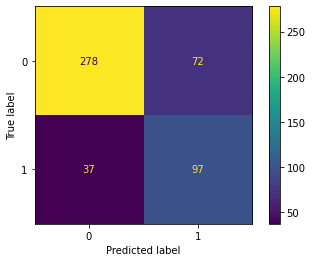

In [283]:
plot_confusion_matrix(gradient,X_test,y_test)
plt.show()

In [284]:
print("True positive rate: ",97/(97+37))
print("True negative rate: ",278/(278+72))

True positive rate:  0.7238805970149254
True negative rate:  0.7942857142857143


In [285]:
forest=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion="gini", max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.03,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.01,
            n_estimators=130, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=True,ccp_alpha=0.05).fit(X_train,y_train)
forest

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


RandomForestClassifier(ccp_alpha=0.05, class_weight='balanced', max_depth=4,
                       min_impurity_decrease=0.03, min_samples_leaf=2,
                       min_samples_split=3, min_weight_fraction_leaf=0.01,
                       n_estimators=130, n_jobs=-1, random_state=0,
                       warm_start=True)

In [286]:
y_pred=forest.predict(X_test)
print("Accuracy on test data: ",accuracy_score(y_test,y_pred))

Accuracy on test data:  0.6880165289256198


In [287]:
print("AUC on test data: ",roc_auc_score(y_test,y_pred))

AUC on test data:  0.7336247334754797


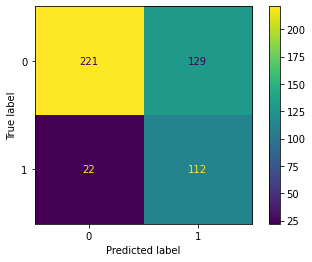

In [288]:
plot_confusion_matrix(forest,X_test,y_test)
plt.show()

In [289]:
print("True positive rate: ",112/(112+22))
print("True negative rate: ",221/(221+129))

True positive rate:  0.835820895522388
True negative rate:  0.6314285714285715


In [290]:
train.to_csv("Diabetes sample.csv")

In [291]:
train2=pd.read_csv("MOCK_DATA _3.csv")
train2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,141,0,0,0,30.0,0.761,27,1
1,8,65,72,23,0,32.0,0.600,42,0
2,2,155,52,27,540,38.7,0.240,25,1
3,3,111,58,31,44,29.5,0.430,22,0
4,2,114,68,22,0,28.7,0.092,25,0


In [292]:
X_train2=train2.drop(["Outcome"],axis=1)
y_train2=train2[["Outcome"]]

In [293]:
X_train2=pd.DataFrame(scaler.fit_transform(X_train2),columns=X_train2.columns)
X_train2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.242317,0.371748,-3.559727,-1.420118,-0.738254,-0.430553,0.920835,-0.652644
1,1.180287,-1.890290,0.108869,0.080121,-0.738254,-0.162365,0.396378,0.637733
2,-0.526837,0.788439,-0.910185,0.341033,3.156848,0.736063,-0.776322,-0.824694
3,-0.242317,-0.521162,-0.604469,0.601944,-0.420875,-0.497600,-0.157397,-1.082770
4,-0.526837,-0.431871,-0.094942,0.014894,-0.738254,-0.604875,-1.258431,-0.824694


In [299]:
gradient=GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.03,
              loss='exponential', max_depth=2, max_features='auto',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=2,
              min_samples_split=2, min_weight_fraction_leaf=0.01,
              n_estimators=130, n_iter_no_change=None, presort='auto',
              random_state=0, subsample=0.95, tol=0.0001,ccp_alpha=0.01,
              validation_fraction=0.2, verbose=0, warm_start=True).fit(X_train2,y_train2)
gradient

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:309: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


GradientBoostingClassifier(ccp_alpha=0.01, criterion='mae', learning_rate=0.03,
                           loss='exponential', max_depth=2, max_features='auto',
                           min_samples_leaf=2, min_weight_fraction_leaf=0.01,
                           n_estimators=130, presort='auto', random_state=0,
                           subsample=0.95, validation_fraction=0.2,
                           warm_start=True)

In [300]:
y_pred=gradient.predict(X_test)
print("Accuracy on test data: ",accuracy_score(y_test,y_pred))

Accuracy on test data:  0.7148760330578512


In [301]:
print("AUC on test data: ",roc_auc_score(y_test,y_pred))

AUC on test data:  0.7153518123667377


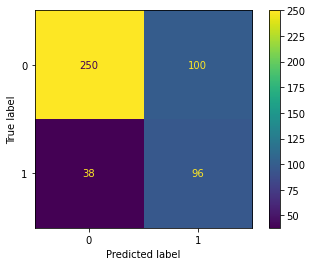

In [302]:
plot_confusion_matrix(gradient,X_test,y_test)
plt.show()

In [303]:
print("True positive rate: ",96/(96+38))
print("True negative rate: ",250/(250+100))

True positive rate:  0.7164179104477612
True negative rate:  0.7142857142857143


In [304]:
forest=RandomForestClassifier(bootstrap=False,class_weight='balanced',
            criterion="gini", max_depth=2, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=0.5, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,max_samples=0.5,
            verbose=0, warm_start=True,ccp_alpha=0.093).fit(X_train2,y_train2)
forest

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


RandomForestClassifier(bootstrap=False, ccp_alpha=0.093,
                       class_weight='balanced', max_depth=2,
                       max_features='sqrt', max_samples=0.5, min_samples_leaf=3,
                       min_samples_split=0.5, n_estimators=200, n_jobs=-1,
                       random_state=0, warm_start=True)

In [305]:
y_pred=forest.predict(X_test)
print("Accuracy on test data: ",accuracy_score(y_test,y_pred))

Accuracy on test data:  0.7851239669421488


In [306]:
print("AUC on test data: ",roc_auc_score(y_test,y_pred))

AUC on test data:  0.710959488272921


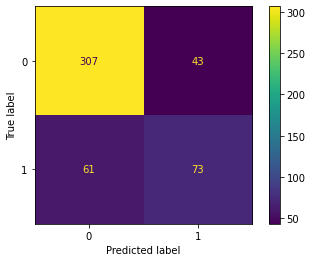

In [307]:
plot_confusion_matrix(forest,X_test,y_test)
plt.show()

In [308]:
print("True positive rate: ",73/(73+61))
print("True negative rate: ",305/(305+45))

True positive rate:  0.5447761194029851
True negative rate:  0.8714285714285714


In [309]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
print(X_train.shape)
print(X_test.shape)

(422, 8)
(346, 8)


In [310]:
BForest=BalancedRandomForestClassifier(n_estimators=270,criterion="entropy",max_depth=4,min_samples_split=4,min_samples_leaf=1,max_features="auto",bootstrap=True,sampling_strategy="auto",replacement=False,n_jobs=-1,warm_start=False,class_weight="balanced_subsample",random_state=0).fit(X_train,y_train)
BForest

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


BalancedRandomForestClassifier(class_weight='balanced_subsample',
                               criterion='entropy', max_depth=4,
                               min_samples_split=4, n_estimators=270, n_jobs=-1,
                               random_state=0)

In [311]:
y_pred=BForest.predict(X_test)
print("Accuracy on test data: ",accuracy_score(y_test,y_pred))

Accuracy on test data:  0.7601156069364162


In [312]:
print("AUC on test data: ",roc_auc_score(y_test,y_pred))

AUC on test data:  0.7770963425512935


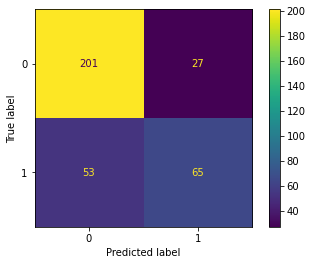

In [313]:
plot_confusion_matrix(forest,X_test,y_test)
plt.show()

In [314]:
print("True positive rate: ", 66/(66+53))
print("True negative rate: ",201/(201+27))

True positive rate:  0.5546218487394958
True negative rate:  0.881578947368421
